In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

model = VGG16(weights='imagenet', include_top=True)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py


553467904/553467096 [==============================] - 146s 0us/step


In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

히든레이어 2개 사용  
1억 3천만개의 파라미터  
클래스가 1000개  


224* 224 * 3 :150528 -> 25088 차원으로 줄임

(224, 224, 3)
float32


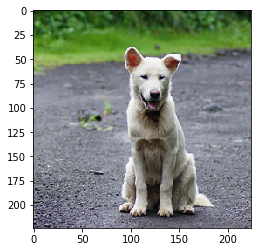

In [9]:
img_path = 'dog.bmp'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img) # 0  ~ 255
print(x.shape) 
print(x.dtype)
plt.imshow(x / 255.0) # int일경우 0부터255라고 생각하고 풀어주는데 img_to_arry를 하면 float형태로 나옴

In [10]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


In [21]:
X = preprocess_input(pred)

In [15]:
plt.show

AttributeError: 'Model' object has no attribute 'predcit'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


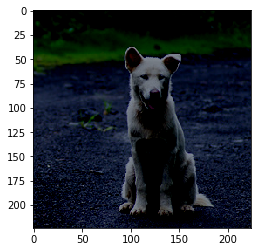

In [14]:
plt.imshow(x[0,:,:,:] /255.0)

In [16]:
pred = model.predict(X)

In [31]:
print(pred.argmax(pred))

TypeError: only integer scalar arrays can be converted to a scalar index

In [28]:
r =decode_predictions(pred, top=3)[0]
print(r[0][1])

Eskimo_dog


In [35]:
import json
json_data =json.load(open('imagenet_class_index.json'))
print(json_data[0])



KeyError: 0

In [36]:
json_data[f"{np.argmax(pred)}"][1]

'Eskimo_dog'

In [41]:
img = cv2.imread("tiger.jpg")
img = cv2.resize(img, (224, 224,))
img = img.reshape(-1, 224, 224, 3)
img = preprocess_input(img)
pred = model.predict(img)
json_data[f"{np.argmax(pred)}"]

['n02129604', 'tiger']

In [42]:
!pip install googletrans

  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15740 sha256=44192d9a233feb1bb33c275a816c444cb8ccb4722ff7111fa3040e2388ad0782
  Stored in directory: c:\users\jinjae\appdata\local\pip\cache\wheels\20\da\eb\a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [44]:
from googletrans import Translator
translator = Translator()
result = translator.translate("tiger", dest="ko")
print(result.text)

호랑이


In [46]:
def toKor(word):
    translator = Translator()
    result = translator.translate(word, dest="ko")
    return result.text

toKor(json_data[f"{np.argmax(pred)}"][1])

'호랑이'

In [48]:
hdic =[]
for d in json_data:
    k = toKor(json_data[d][1])
    hdic.append(k)

KeyboardInterrupt: 

In [49]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

model2 = ResNet50(weights="imagenet")

102858752/102853048 [==============================] - 51s 0us/step


In [50]:
img = cv2.imread("tiger.jpg")
img = cv2.resize(img, (224, 224,))
img = img.reshape(-1, 224, 224, 3)
img = preprocess_input(img)
pred = model2.predict(img)
json_data[f"{np.argmax(pred)}"]

['n02129604', 'tiger']

In [51]:
model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [52]:
img = cv2.imread("tiger.jpg")
img = cv2.resize(img, (224, 224,))
img = img.reshape(-1, 224, 224, 3)
img = preprocess_input(img)
pred = model2.predict(img)
r = json_data[f"{np.argmax(pred)}"]
r = toKor(r)
print(r)

AttributeError: 'list' object has no attribute 'text'

In [54]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

model3 = InceptionV3(weights="imagenet")


96116736/96112376 [==============================] - 36s 0us/step


In [55]:
model3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_99 (Activation)      (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [63]:
img = cv2.imread("unnamed.jpg")
img = cv2.resize(img, (299, 299,))
img = img.reshape(-1, 299, 299, 3)
img = preprocess_input(img)
pred = model3.predict(img)
r = toKor(json_data[f"{np.argmax(pred)}"][1])
print(r)

코모도 왕 도마뱀


In [74]:
%%writefile server.py

import flask
from flask import Flask,render_template,url_for,request
import base64
import numpy as np
import cv2
from keras.models import load_model 
import io 
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
import json
import tensorflow as tf
from keras import backend as K
import pickle


init_Base64 = 22   # data:image/png;base64, 로 시작하
app = Flask(__name__)

global model 
global sess
global graph

sess = tf.Session()       
graph = tf.get_default_graph() 
K.set_session(sess)

model = ResNet50(weights='imagenet')
with open("hdict.bin","rb") as fr:
    hdict = pickle.load(fr)

@app.route('/')
def home():
    return "ok~~~"


@app.route('/image', methods=['POST'])
def upload():       
    draw = request.form['photo_cap']
    draw = draw[init_Base64:]
    draw_decoded = base64.b64decode(draw)
    image = np.asarray(bytearray(draw_decoded), dtype="uint8")
    
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)    
    image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA)                
    image = image.reshape(-1, 224, 224, 3)
    image = preprocess_input(image)
    
    with graph.as_default():
        K.set_session(sess)
        pred = model.predict(image)
        r = hdict[np.argmax(pred)]
        
    return f"인식결과:{r}"
    
if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)
    

Overwriting server.py


In [ ]:
import pickle
# with open("hdict.bin", "wb") as fw:
#     pickle.dump(hdict, fw)
    
with open("hdict.bin", "rb") as fr:
    hdict2 = pickle.load(fr)
print(hdict2)